In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.api import qqplot
from scipy import stats
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA


from time import time


In [3]:
#reading data & cleaning
b = pd.read_csv("Brent Spot Price.csv")
c = pd.read_csv("Coal Power.csv")

In [4]:
b.head()

,Unnamed: 0,"Brent crude oil spot price, Monthly (dollars per barrel)"
0,1990 01,21.251
1,1990 02,19.813
2,1990 03,18.387
3,1990 04,16.612
4,1990 05,16.352


In [5]:
list(b.columns)[0]

'Unnamed: 0'

In [6]:
b.rename(columns={list(b.columns)[0]:'time', list(b.columns)[1]:'oil_price'}, inplace=True)
b.head()

,time,oil_price
0,1990 01,21.251
1,1990 02,19.813
2,1990 03,18.387
3,1990 04,16.612
4,1990 05,16.352


In [7]:
c.head()

,Unnamed: 0,Total consumption : Texas : electric power (total) : quarterly (short tons)
0,2001 Q1,22164839
1,2001 Q2,22952510
2,2001 Q3,25962808
3,2001 Q4,21357650
4,2002 Q1,21917084


In [8]:
c.rename(columns={list(c.columns)[0]:'time', list(c.columns)[1]:'coal_power'}, inplace=True)
c.head()

,time,coal_power
0,2001 Q1,22164839
1,2001 Q2,22952510
2,2001 Q3,25962808
3,2001 Q4,21357650
4,2002 Q1,21917084


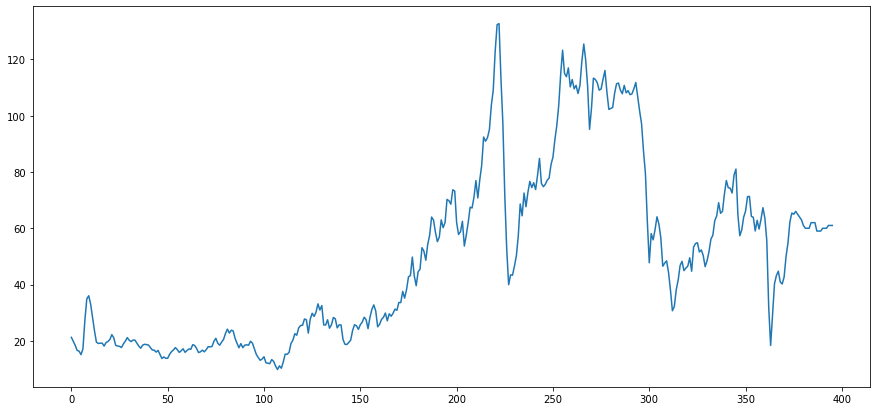

In [9]:
#plotting raw data
plt.figure(figsize=(15,7))
plt.plot(b.oil_price)
plt.show()

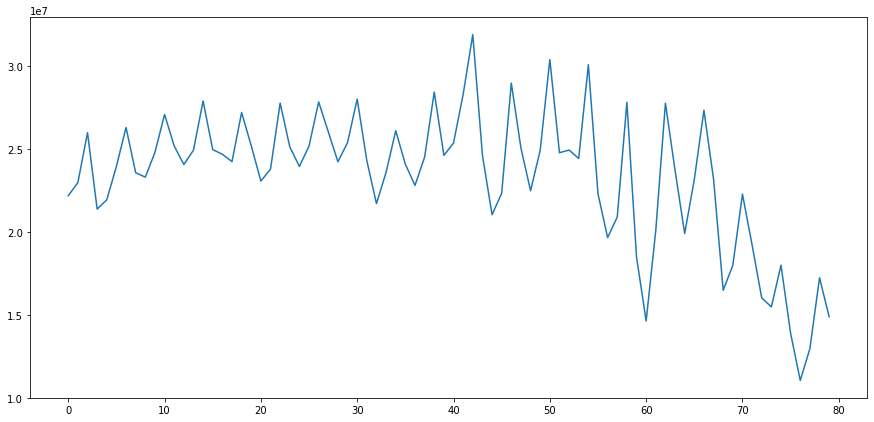

In [10]:
plt.figure(figsize=(15,7))
plt.plot(c.coal_power)
plt.show()

# 1

In [11]:
print('p-value of adf test of oil price is:',adfuller(b['oil_price'])[1])
print('p-value of adf test of coal power is:',adfuller(c['coal_power'])[1])

p-value of adf test of oil price is: 0.15150178029715095
p-value of adf test of coal power is: 0.9986413567364828


then it shows that the oil bro is more stationary mmmm

In [12]:
c.shape

(80, 2)

In [13]:
c['coal_power_diff_1'] = c['coal_power'] - c['coal_power'].shift(1)

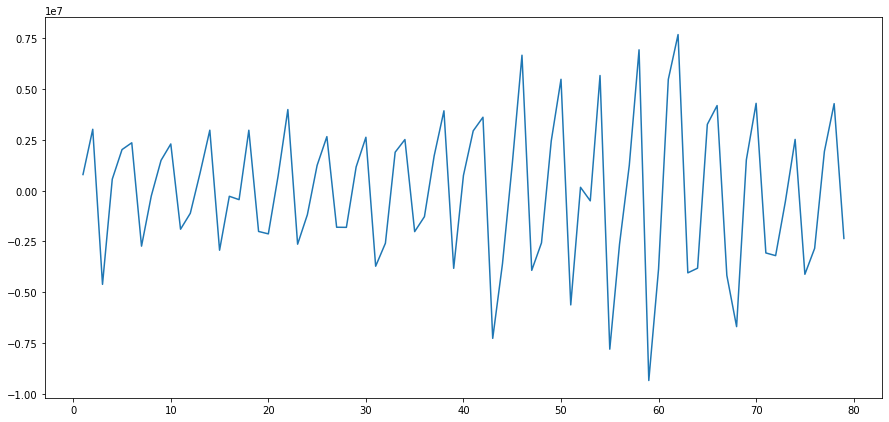

In [14]:
plt.figure(figsize=(15,7))
plt.plot(c.coal_power_diff_1.dropna())
plt.show()

In [15]:
print('p-value of adf test of coal power (shifted version) is:',adfuller(c['coal_power_diff_1'].dropna())[1])

p-value of adf test of coal power (shifted version) is: 0.00018784663168900636


mmmm I didn't rolled it but I beleive nothing like this could stationarize=) it this much

In [16]:
b.shape

(396, 2)

In [17]:
b['oil_price_rolled'] = b['oil_price'].rolling(window = 10).mean()

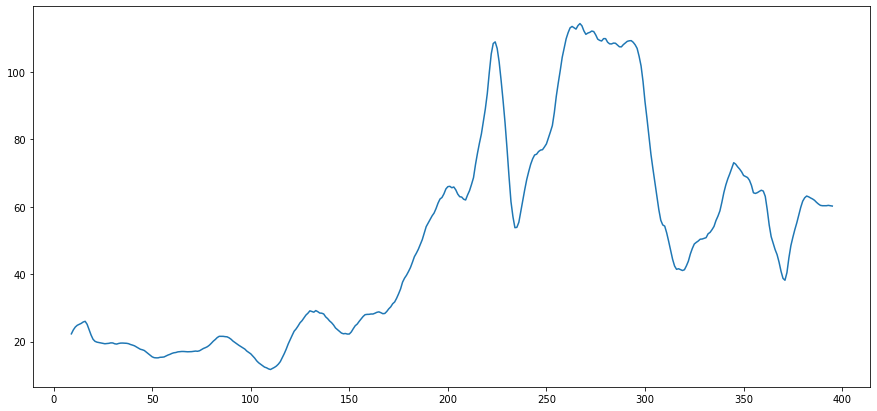

In [18]:
plt.figure(figsize=(15,7))
plt.plot(b.oil_price_rolled.dropna())
plt.show()

In [19]:
print('p-value of adf test of coal power (rolled) is:',adfuller(b['oil_price_rolled'].dropna())[1])

p-value of adf test of coal power (rolled) is: 0.44459844335085374


In [20]:
b['oil_price_diff_1'] = b['oil_price'] - b['oil_price'].shift(1)

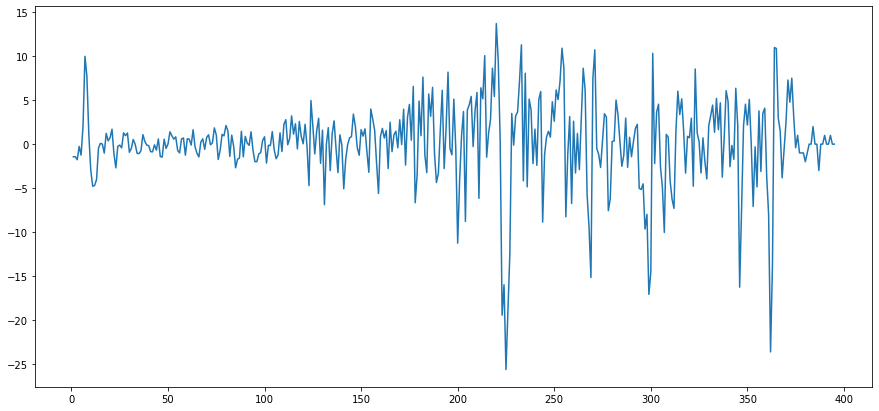

In [21]:
plt.figure(figsize=(15,7))
plt.plot(b.oil_price_diff_1.dropna())
plt.show()

In [22]:
print('p-value of adf test of coal power (rolled) is:',adfuller(b['oil_price_diff_1'].dropna())[1])

p-value of adf test of coal power (rolled) is: 7.480882139513171e-25


then obviously shifting has a way better effect on stationarizing than rolling

# 2

<Figure size 1080x504 with 0 Axes>

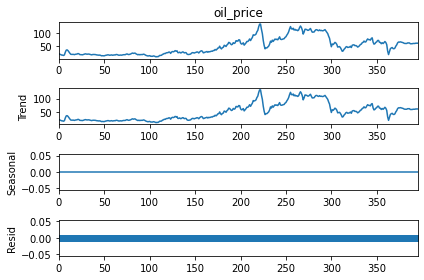

In [23]:
resultb = seasonal_decompose(b['oil_price'], model='additive', period=1)
plt.figure(figsize=(15,7))
resultb.plot()
plt.show()

<Figure size 1080x504 with 0 Axes>

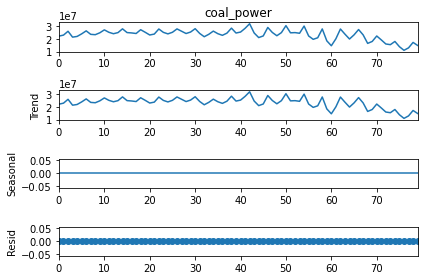

In [24]:
resultc = seasonal_decompose(c['coal_power'], model='additive', period=1)
plt.figure(figsize=(15,7))
resultc.plot()
plt.show()

<Figure size 1080x504 with 0 Axes>

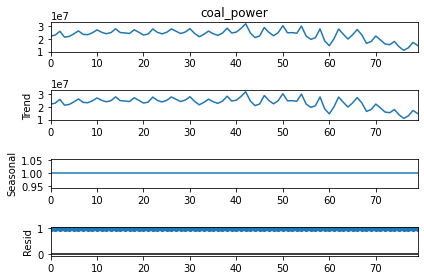

In [25]:
resultc = seasonal_decompose(c['coal_power'], model='multiplicative', period=1)
plt.figure(figsize=(15,7))
resultc.plot()
plt.show()

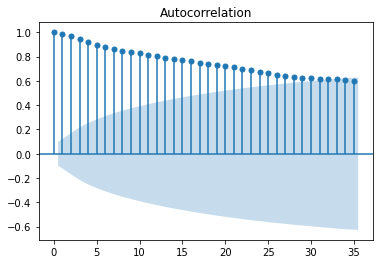

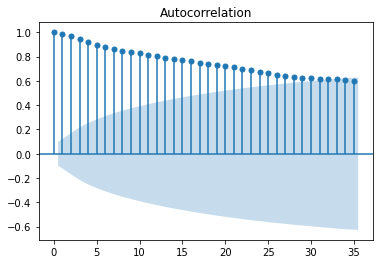

In [26]:
plot_acf(b.oil_price, lags = 35) 

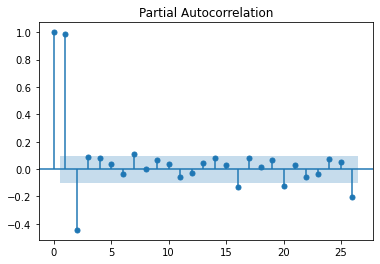

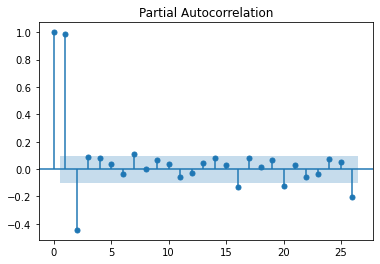

In [27]:
plot_pacf(b.oil_price)

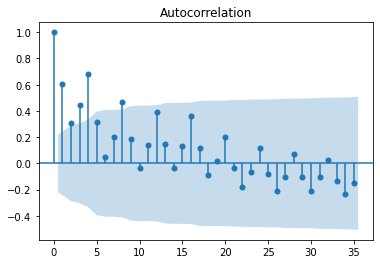

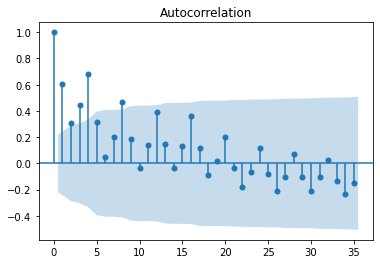

In [28]:
plot_acf(c.coal_power, lags = 35)

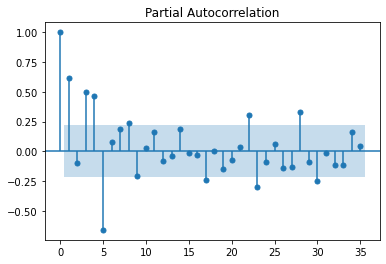

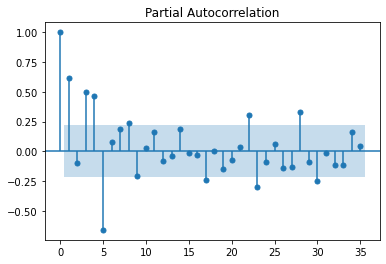

In [29]:
plot_pacf(c.coal_power, lags = 35)

partitioning data far test and train

# 3

In [30]:
b['train'] = b['oil_price'][:int(0.8*b.shape[0])]
b['test'] = b['oil_price'][int(0.8*b.shape[0])+1:]

c['train'] = c['coal_power'][:int(0.8*c.shape[0])]
c['test'] = c['coal_power'][int(0.8*c.shape[0])+1:]

# AR

In [82]:
model_AR_c = ARMA(c['train'].dropna(), order=(4,0))

In [98]:
model_AR_b = ARMA(b['train'].dropna(), order=(2,0))

In [99]:
start = time()
model_AR_c_fit = model_AR_c.fit()
end = time()
print('Model Fitting Time:', end - start)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.59007D+01    |proj g|=  1.46665D-02

At iterate    5    f=  1.58980D+01    |proj g|=  5.14433D-03

At iterate   10    f=  1.58979D+01    |proj g|=  1.94706D-03

At iterate   15    f=  1.58978D+01    |proj g|=  1.03029D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   1.776D-07   1.590D+01
  F =   15.897839809167106     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Fi

 This problem is unconstrained.


In [100]:
start = time()
model_AR_b_fit = model_AR_b.fit()
end = time()
print('Model Fitting Time:', end - start)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88874D+00    |proj g|=  6.74882D-04

At iterate    5    f=  2.88874D+00    |proj g|=  8.83737D-05

At iterate   10    f=  2.88870D+00    |proj g|=  3.02656D-03

At iterate   15    f=  2.88844D+00    |proj g|=  2.32392D-04

At iterate   20    f=  2.88844D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     24      1     0     0   0.000D+00   2.888D+00
  F =   2.8884379453415514     

CONVERG

 This problem is unconstrained.


In [101]:
print(model_AR_b_fit.summary)

<bound method ARMAResults.summary of <statsmodels.tsa.arima_model.ARMAResults object at 0x7eff2c3ddfa0>>


In [102]:
b['test'].dropna().index[-1]-b['test'].dropna().index[0]

78

In [103]:
model_AR_b_fit.predict(start=b['test'].dropna().index[0]-1, end=b['test'].dropna().index[-1])

316    42.957006
317    43.522206
318    43.760025
319    43.865202
320    43.916511
         ...    
391    44.443011
392    44.445637
393    44.448200
394    44.450701
395    44.453143
Length: 80, dtype: float64

Text(0, 0.5, 'Coal_power')

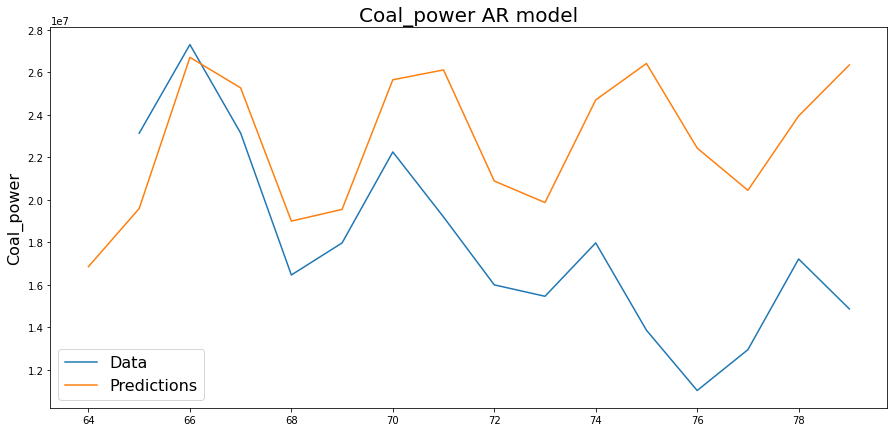

In [104]:
plt.figure(figsize=(15,7))

plt.plot(c['test'].dropna())
plt.plot(model_AR_c_fit.predict(start=c['test'].dropna().index[0]-1, end=c['test'].dropna().index[-1]))

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Coal_power AR model', fontsize=20)
plt.ylabel('Coal_power', fontsize=16)

Text(0, 0.5, 'Oil_orice')

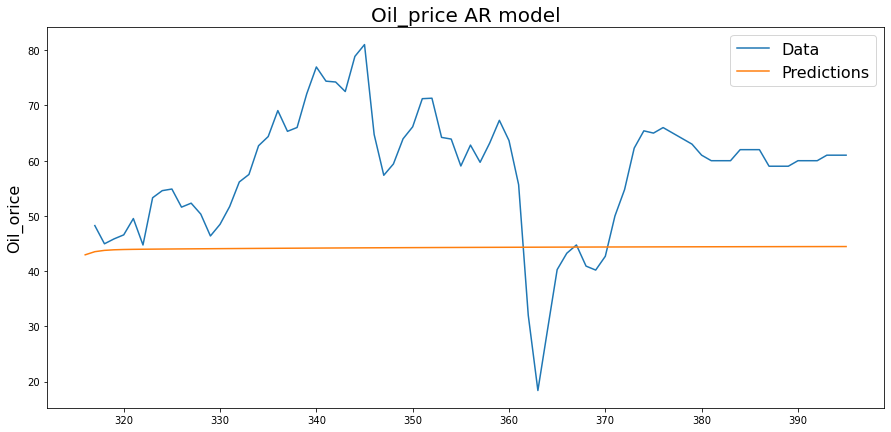

In [132]:
plt.figure(figsize=(15,7))

plt.plot(b['test'].dropna())
plt.plot(model_AR_b_fit.predict(start=b['test'].dropna().index[0]-1, end=b['test'].dropna().index[-1]))

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Oil_price AR model', fontsize=20)
plt.ylabel('Oil_orice', fontsize=16)

# MA

In [127]:
model_MA_b = ARMA(b['train'].dropna(), order=(0,1))

In [124]:
model_MA_c = ARMA(c['train'].dropna(), order=(0,4))

In [125]:
start = time()
model_MA_c_fit = model_MA_c.fit()
end = time()
print('Model Fitting Time:', end - start)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.59486D+01    |proj g|=  3.88752D-02

At iterate    5    f=  1.59352D+01    |proj g|=  1.56804D-02

At iterate   10    f=  1.59305D+01    |proj g|=  9.55520D-03

At iterate   15    f=  1.59297D+01    |proj g|=  3.66960D-03

At iterate   20    f=  1.59295D+01    |proj g|=  2.34142D-03

At iterate   25    f=  1.59294D+01    |proj g|=  1.01394D-03

At iterate   30    f=  1.59294D+01    |proj g|=  7.25287D-04

At iterate   35    f=  1.59294D+01    |proj g|=  1.73905D-04

At iterate   40    f=  1.59294D+01    |proj g|=  6.91003D-05

At iterate   45    f=  1.59294D+01    |proj g|=  1.97531D-04

At iterate   50    f=  1.59294D+01    |proj g|=  6.28830D-05

At iterate   55    f=  1.59294D+01    |proj g|=  5.15143D-05

At iterate   60    f=  1.59294D+01    |proj g|=  1.59872D-06

           * * *

Tit   = 

In [128]:
start = time()
model_MA_b_fit = model_MA_b.fit()
end = time()
print('Model Fitting Time:', end - start)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.32177D+00    |proj g|=  5.84279D-03

At iterate    5    f=  4.32089D+00    |proj g|=  1.18128D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      9      1     0     0   0.000D+00   4.321D+00
  F =   4.3208948928002293     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Fitting Time: 0.05336499214172363


 This problem is unconstrained.


Text(0, 0.5, 'Coal_power')

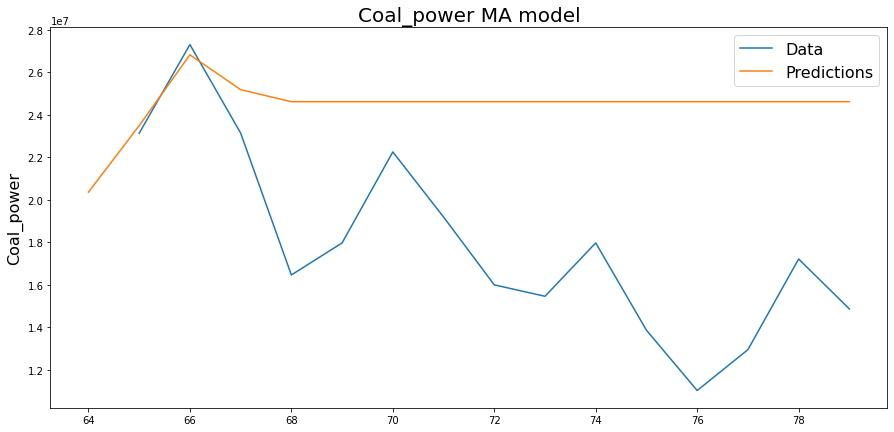

In [130]:
plt.figure(figsize=(15,7))

plt.plot(c['test'].dropna())
plt.plot(model_MA_c_fit.predict(start=c['test'].dropna().index[0]-1, end=c['test'].dropna().index[-1]))

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Coal_power MA model', fontsize=20)
plt.ylabel('Coal_power', fontsize=16)

Text(0, 0.5, 'Oil_orice')

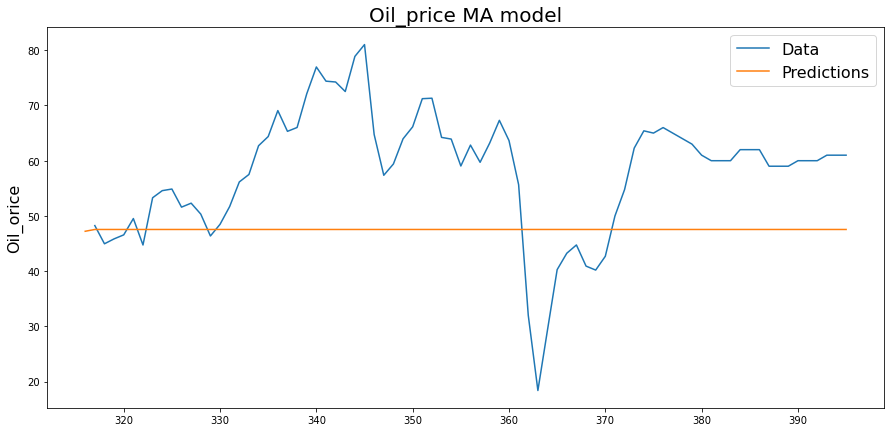

In [133]:
plt.figure(figsize=(15,7))

plt.plot(b['test'].dropna())
plt.plot(model_MA_b_fit.predict(start=b['test'].dropna().index[0]-1, end=b['test'].dropna().index[-1]))

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Oil_price MA model', fontsize=20)
plt.ylabel('Oil_orice', fontsize=16)

# ARMA

In [136]:
model_ARMA_b = ARMA(b['train'].dropna(), order=(4,1))

In [142]:
model_ARMA_c = ARMA(c['train'].dropna(), order=(2,2))

In [143]:
start = time()
model_ARMA_c_fit = model_ARMA_c.fit()
end = time()
print('Model Fitting Time:', end - start)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.59179D+01    |proj g|=  3.68697D-02

At iterate    5    f=  1.58913D+01    |proj g|=  1.10722D-01

At iterate   10    f=  1.58894D+01    |proj g|=  5.52749D-03

At iterate   15    f=  1.58868D+01    |proj g|=  2.42331D-03

At iterate   20    f=  1.58866D+01    |proj g|=  7.67564D-04

At iterate   25    f=  1.58866D+01    |proj g|=  1.33049D-04

At iterate   30    f=  1.58866D+01    |proj g|=  2.43006D-04

At iterate   35    f=  1.58866D+01    |proj g|=  3.53495D-05

At iterate   40    f=  1.58866D+01    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


In [145]:
start = time()
model_ARMA_b_fit = model_ARMA_b.fit()
end = time()
print('Model Fitting Time:', end - start)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88335D+00    |proj g|=  8.74945D-04

At iterate    5    f=  2.88331D+00    |proj g|=  9.94316D-04

At iterate   10    f=  2.88328D+00    |proj g|=  9.60521D-04

At iterate   15    f=  2.88327D+00    |proj g|=  6.13332D-04

At iterate   20    f=  2.88291D+00    |proj g|=  5.51528D-03

At iterate   25    f=  2.88264D+00    |proj g|=  4.28546D-05

At iterate   30    f=  2.88264D+00    |proj g|=  2.81997D-05


 This problem is unconstrained.



At iterate   35    f=  2.88264D+00    |proj g|=  1.99840D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     49      1     0     0   3.331D-06   2.883D+00
  F =   2.8826403159796441     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Fitting Time: 0.4185335636138916


Text(0, 0.5, 'Coal_power')

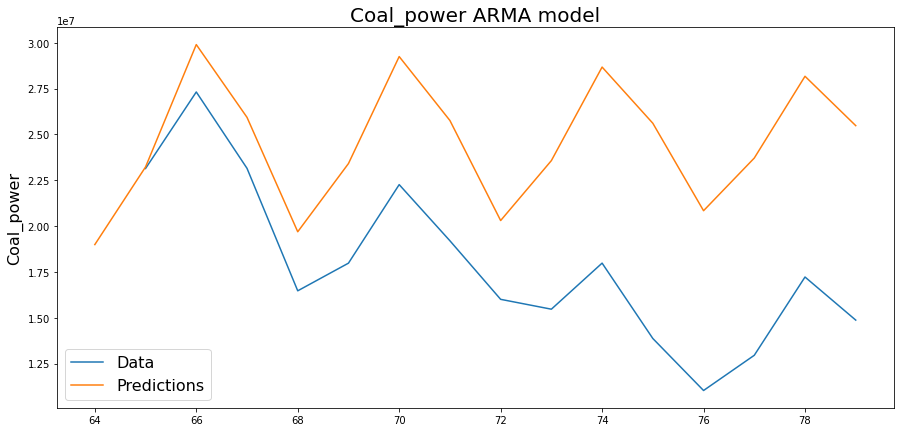

In [144]:
plt.figure(figsize=(15,7))

plt.plot(c['test'].dropna())
plt.plot(model_ARMA_c_fit.predict(start=c['test'].dropna().index[0]-1, end=c['test'].dropna().index[-1]))

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Coal_power ARMA model', fontsize=20)
plt.ylabel('Coal_power', fontsize=16)

Text(0, 0.5, 'Oil_orice')

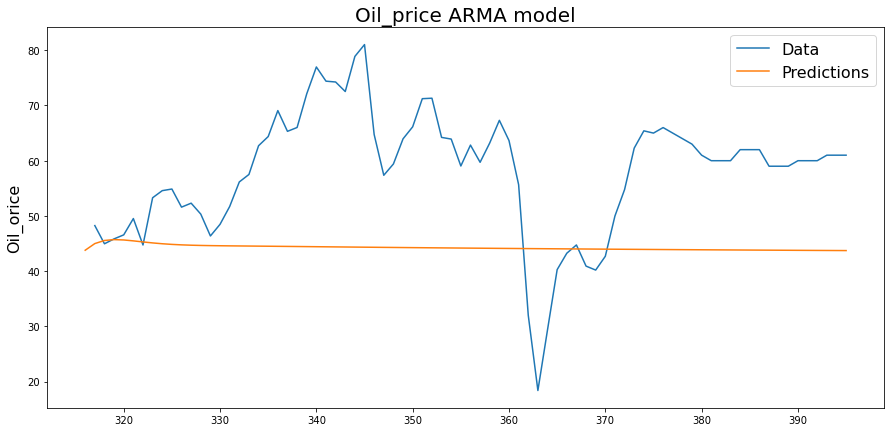

In [146]:
plt.figure(figsize=(15,7))

plt.plot(b['test'].dropna())
plt.plot(model_ARMA_b_fit.predict(start=b['test'].dropna().index[0]-1, end=b['test'].dropna().index[-1]))

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Oil_price ARMA model', fontsize=20)
plt.ylabel('Oil_orice', fontsize=16)

In [39]:
start = time()
model_AR_b_fit = model_AR_b.fit()
end = time()
print('Model Fitting Time:', end - start)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88870D+00    |proj g|=  6.75193D-04

At iterate    5    f=  2.88869D+00    |proj g|=  4.02567D-04

At iterate   10    f=  2.88869D+00    |proj g|=  8.79963D-04

At iterate   15    f=  2.88855D+00    |proj g|=  3.64602D-03

At iterate   20    f=  2.88840D+00    |proj g|=  5.54223D-05

At iterate   25    f=  2.88840D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     31      1     0     0   

 This problem is unconstrained.


In [78]:
model_ARIMA_b = ARIMA(b['train'].dropna(), order=(30,0,0))

In [79]:
start = time()
model_ARIMA_b_fit = model_ARIMA_b.fit()
end = time()
print('Model Fitting Time:', end - start)

/home/garfield/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Fitting Time: 11.39609408378601


In [80]:
print(model_ARIMA_b_fit.summary)

<bound method SARIMAXResults.summary of <statsmodels.tsa.arima.model.ARIMAResults object at 0x7eff2dea65e0>>


Text(0, 0.5, 'Oil_orice')

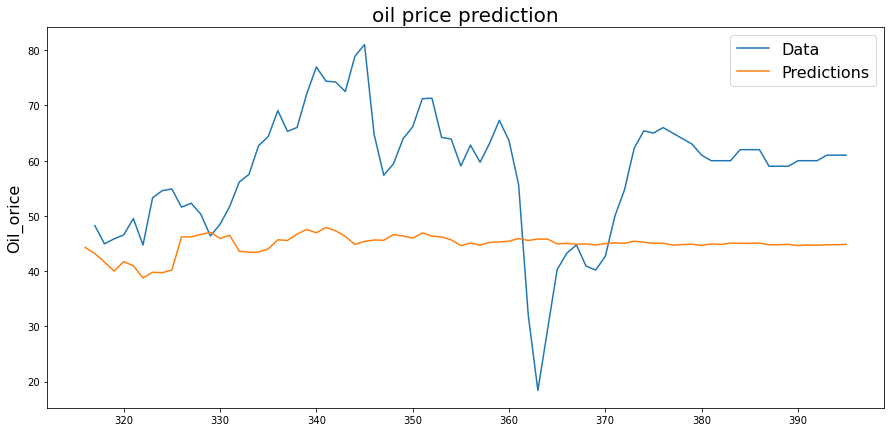

In [81]:
plt.figure(figsize=(15,7))

plt.plot(b['test'].dropna())
plt.plot(model_ARIMA_b_fit.predict(start=b['test'].dropna().index[0]-1, end=b['test'].dropna().index[-1]))

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('oil price prediction', fontsize=20)
plt.ylabel('Oil_orice', fontsize=16)